In [2]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [22]:
#Trabajar con otro tipo de datos Fifa
population = pd.read_csv('1.Poblaciones.csv', sep = ';',encoding='utf-8')
#imprimir los primeros 5 datos del archivo
population.head(5)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,1/12/2007,Poblacion Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,1/12/2007,Poblacion menor de 15 aoos,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,1/12/2007,Poblacion en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,1/12/2007,Poblacion Economicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,1/12/2007,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018



##Generar graficas y reportes del total de personas empleadas y desempleadas por año.

In [23]:
population['fecha'] =  pd.to_datetime(population['Periodo'], infer_datetime_format=True)
population.head(5)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer,fecha
0,ENEMDU,1/12/2007,Poblacion Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656,2007-01-12
1,ENEMDU,1/12/2007,Poblacion menor de 15 aoos,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194,2007-01-12
2,ENEMDU,1/12/2007,Poblacion en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462,2007-01-12
3,ENEMDU,1/12/2007,Poblacion Economicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798,2007-01-12
4,ENEMDU,1/12/2007,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018,2007-01-12


In [27]:


year_grouped = population.groupby([population['fecha'].map(lambda x: x.year),population['Indicadores']]).last()

year_grouped_reset = year_grouped.droplevel(0).reset_index()
year_grouped_reset.head(10)
year_grouped_reset2 = year_grouped_reset


In [6]:
year_grouped_reset = year_grouped_reset.loc[(year_grouped_reset['Indicadores'] == 'Desempleo') | (year_grouped_reset['Indicadores'] == 'Empleo')]
year_grouped_reset.head(10)

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer,fecha
0,Desempleo,ENEMDU,1/12/2007,316.697,256.662,60.036,144.918,171.780,2007-01-12
5,Empleo,ENEMDU,1/12/2007,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018,2007-01-12
18,Desempleo,ENEMDU,1/12/2008,380.026,317.011,63.015,165.296,214.730,2008-01-12
23,Empleo,ENEMDU,1/12/2008,6.005.395,4.012.298,1.993.097,3.635.236,2.370.159,2008-01-12
36,Desempleo,ENEMDU,1/12/2009,423.802,347.068,76.734,201.625,222.177,2009-01-12
41,Empleo,ENEMDU,1/12/2009,6.125.135,4.050.179,2.074.956,3.699.840,2.425.296,2009-01-12
54,Desempleo,ENEMDU,1/12/2010,323.027,264.587,58.440,159.583,163.443,2010-01-12
59,Empleo,ENEMDU,1/12/2010,6.113.230,4.054.350,2.058.880,3.738.807,2.374.423,2010-01-12
72,Desempleo,ENEMDU,1/12/2011,276.787,224.678,52.109,131.747,145.040,2011-01-12
77,Empleo,ENEMDU,1/12/2011,6.304.834,4.212.188,2.092.646,3.844.507,2.460.327,2011-01-12


In [7]:
emp_desemp_por_anio = year_grouped_reset[["Indicadores", "fecha", "Total"]]
emp_desemp_por_anio.head(10)

,Indicadores,fecha,Total
0,Desempleo,2007-01-12,316.697
5,Empleo,2007-01-12,6.019.332
18,Desempleo,2008-01-12,380.026
23,Empleo,2008-01-12,6.005.395
36,Desempleo,2009-01-12,423.802
41,Empleo,2009-01-12,6.125.135
54,Desempleo,2010-01-12,323.027
59,Empleo,2010-01-12,6.113.230
72,Desempleo,2011-01-12,276.787
77,Empleo,2011-01-12,6.304.834


In [8]:
emp_desemp_por_anio['fecha'] = emp_desemp_por_anio['fecha'].dt.year.astype(int)
emp_desemp_por_anio['Total'] = emp_desemp_por_anio['Total'].astype(str).str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
emp_desemp_por_anio_pivot = emp_desemp_por_anio.pivot(index='fecha', columns='Indicadores', values='Total').fillna(0)
emp_desemp_por_anio_pivot.head(10)

Indicadores,Desempleo,Empleo
fecha,,
2007,316697.0,6019332.0
2008,380026.0,6005395.0
2009,423802.0,6125135.0
2010,323027.0,6113230.0
2011,276787.0,6304834.0
2012,276174.0,6424840.0
2013,288745.0,6664241.0
2014,273414.0,6921107.0
2015,357892.0,7140636.0


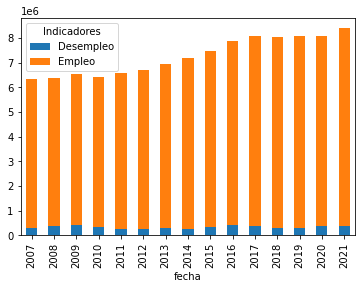

In [10]:

emp_desemp_por_anio_pivot.plot(kind='bar', stacked=True)


## Generar grafico de pie por personas basadas en la sectorización de empleo.

In [14]:
sectorizacion=pd.read_csv('4. Sectorizacion del empleo.csv', sep = ';',encoding='latin1').dropna()
sectorizacion_ultima=sectorizacion.transpose()
sectorizacion_ultima.head()

,0,1,2,3
Periodo,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector
jun-07,-,-,-,-
sep-07,-,-,-,-
dic-07,"41,00%","45,10%","3,30%","10,60%"
mar-08,-,-,-,-


In [16]:
### oct-21 -> ultimo senso
porcentaje_sectores=sectorizacion_ultima.loc['oct-21']
porcentaje_sectores.head(10)

0    41,40%
1    52,20%
2     2,20%
3     4,20%
Name: oct-21, dtype: object

([<matplotlib.patches.Wedge at 0x7fcba4b978d0>,
 [Text(0.2935921731659033, 1.0600960502971994, 'Sector Formal'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Sector Informal'),
  Text(1.039569426194266, -0.3595767068681234, 'Empleo Doméstico'),
  Text(1.090438411371068, -0.1447206654439566, 'No Clasificados por Sector')])

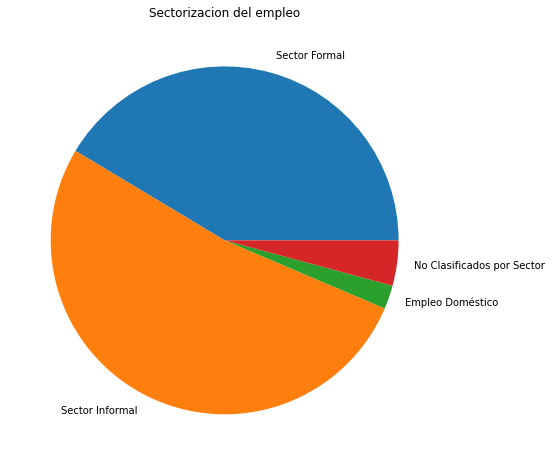

In [34]:
fig = plt.figure(figsize=(8,8))
plt.title("Sectorizacion del empleo")
sectores = sectorizacion_ultima.loc['Periodo']
plt.pie([41.4,52.2,2.2,4.2], labels = sectores)

In [28]:
subempleo = year_grouped_reset2.loc[(year_grouped_reset2['Indicadores'] == 'Subempleo')]
empleo_pleno = year_grouped_reset2.loc[(year_grouped_reset2['Indicadores'] == 'Empleo Adecuado/Pleno')]
empleo_no_pleno = year_grouped_reset2.loc[(year_grouped_reset2['Indicadores'] == 'Otro Empleo no pleno')]
subempleo.head()

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer,fecha
15,Subempleo,ENEMDU,1/12/2007,1.155.872,687.714,468.158,679.118,476.753,2007-01-12
33,Subempleo,ENEMDU,1/12/2008,957.978,588.824,369.155,549.097,408.881,2008-01-12
51,Subempleo,ENEMDU,1/12/2009,1.071.615,664.855,406.760,636.204,435.411,2009-01-12
69,Subempleo,ENEMDU,1/12/2010,889.255,559.150,330.106,550.026,339.229,2010-01-12
87,Subempleo,ENEMDU,1/12/2011,706.458,421.914,284.544,428.949,277.509,2011-01-12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<bound method _AxesBase.set_yticks of <matplotlib.axes._subplots.AxesSubplot object at 0x7fcba4bbef50>>

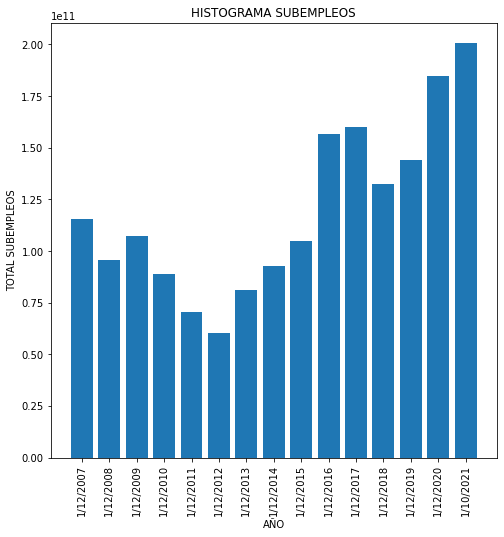

In [35]:
subempleo['Total'] = subempleo['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(8,8))
plt.title('HISTOGRAMA SUBEMPLEOS')
plt.bar(subempleo['Periodo'], subempleo['Total'])
plt.xlabel('FECHA')
plt.xticks(rotation=90)
plt.ylabel('TOTAL SUBEMPLEOS')
plt.gca().set_xticks
plt.gca().set_yticks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<bound method _AxesBase.set_yticks of <matplotlib.axes._subplots.AxesSubplot object at 0x7fcba4ada350>>

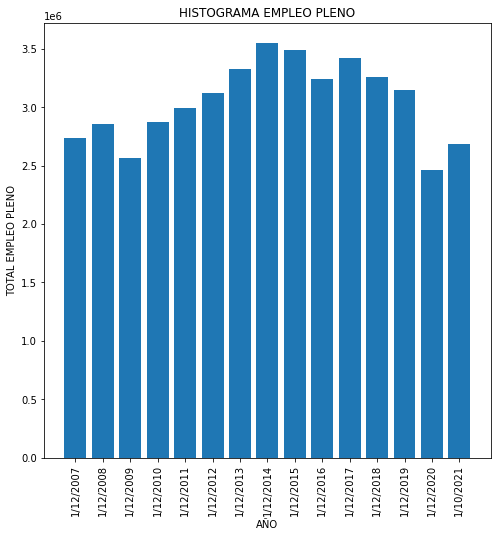

In [36]:
empleo_pleno['Total'] = empleo_pleno['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(8,8))
plt.title('HISTOGRAMA EMPLEO PLENO')
plt.bar(empleo_pleno['Periodo'], empleo_pleno['Total'])
plt.xlabel('FECHA')
plt.xticks(rotation=90)
plt.ylabel('TOTAL EMPLEO PLENO')
plt.gca().set_xticks
plt.gca().set_yticks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<bound method _AxesBase.set_yticks of <matplotlib.axes._subplots.AxesSubplot object at 0x7fcba4b327d0>>

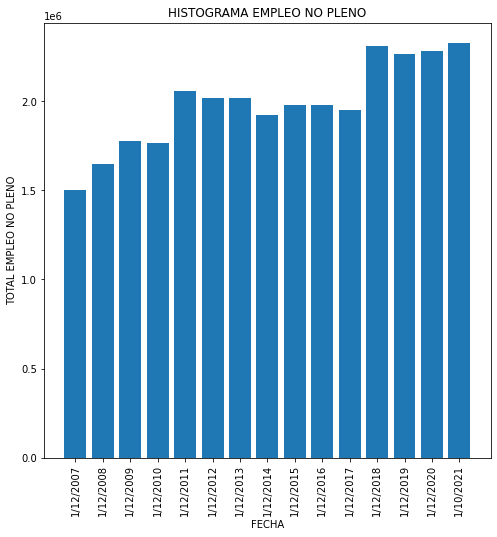

In [37]:
empleo_no_pleno['Total'] = empleo_no_pleno['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(8,8))
plt.title('HISTOGRAMA EMPLEO NO PLENO')
plt.bar(empleo_no_pleno['Periodo'], empleo_no_pleno['Total'])
plt.xlabel('FECHA')
plt.xticks(rotation=90)
plt.ylabel('TOTAL EMPLEO NO PLENO')
plt.gca().set_xticks
plt.gca().set_yticks